In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [50]:
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import sklearn.multiclass
import sklearn.preprocessing

# style.use("dark_background")

# Maszynowe Uczenie

Powyżej wczytano najistotniejsze moduły biblioteki *scikit-learn* używanej do maszynowego uczenia w Pythonie. Całe API można znaleźć tutaj:

http://scikit-learn.org/stable/modules/classes.html

Poza tym, warto też zaglądać do:

http://scikit-learn.org/stable/user_guide.html

Na początku, wczytaj i przejrzyj bazę cyfr wczytywaną metodą *sklearn.datasets.load_digits()*:

In [51]:
digits = sklearn.datasets.load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

Wczytaj bazę ponownie ustawiając argument *return_X_y* na *True*:

In [52]:
X, y = sklearn.datasets.load_digits(return_X_y = True)


Narysuj kilka przykładowych obrazków z bazy:

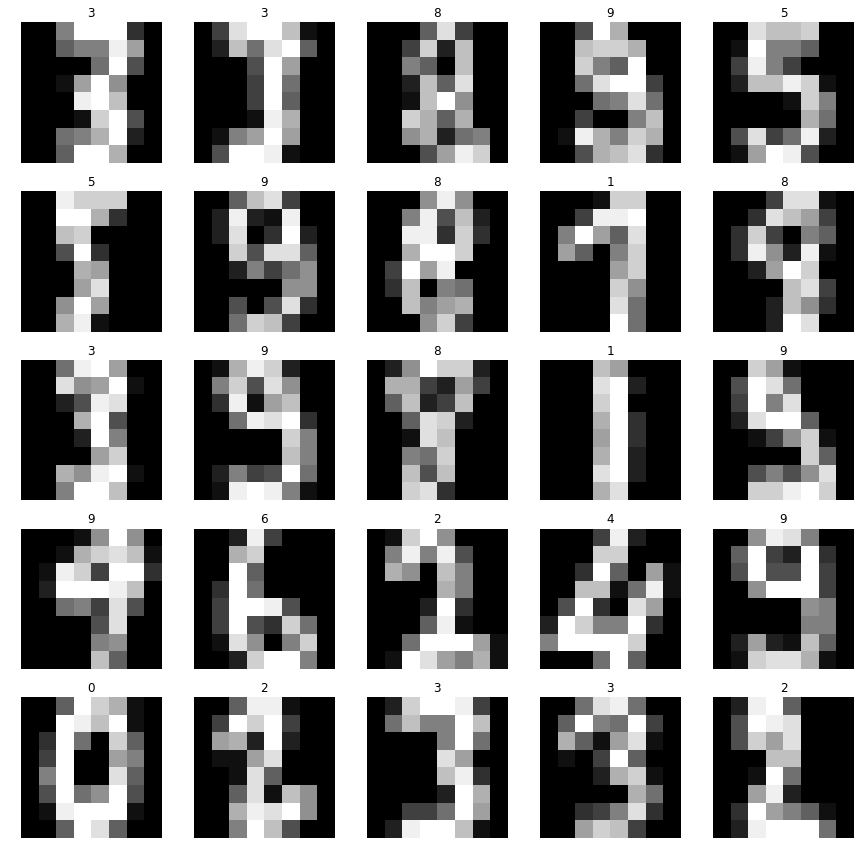

In [53]:
figure(figsize=(15,15))

for i in range(25):
    subplot(5, 5, i + 1)
    idx = random.randint(0, X.shape[0])
    imshow(X[idx].reshape(8, 8), cmap=cm.gray)
    _ = axis('off')
    _ = title(y[idx])

## Podział danych na testowe i treningowe

Można to łatwo osiągnąć używając metody *sklearn.model_selection.train_test_split()*. Argument *test_size* pozwala na ustalenie procentu danych jakie mają tworzyć w dane testowe.

Podziel losowo zbiór na dane treningowe (90%) i testowe (10%) i narysuj histogram klas w danych testowych:

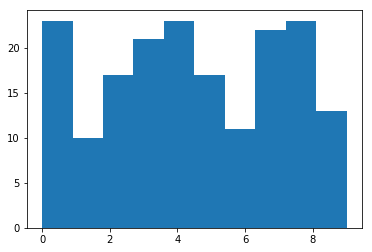

In [54]:
X_tr, X_tst, y_tr, y_tst = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

_ = hist(y_tst)

### Stratyfikacja

Scikit-learn ma bardzo wygodne klasy umożliwiające na stratyfikację podziału danych, czyli zapewnienie że ilość klas będzie równomierna. Użyj klasy *sklearn.model_selection.StratifiedShuffleSplit* żeby podzielić dane tak jak wyżej. Klasa ta może wygenerować kilka podziałów, ale dla naszej potrzeby wystarczy ustawić *n_splits* na 1. To co zwraca metoda *split* tej klasy jest generatorem (specjalna rodzaj Pythonowego objektu nadająca się do użycia w pętlach), ale można użyć metdoty *next* żeby wyciągnąć pierwszy (i jedyny) element tego generatora.

Wygeneruj stratyfikowany podział danych jak wyżej i wylicz histogram klas testowych:

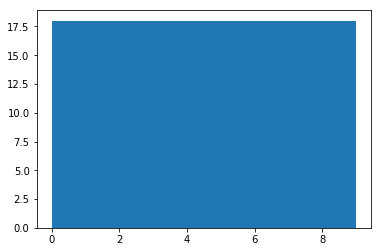

In [55]:
sss = sklearn.model_selection.StratifiedShuffleSplit(test_size=0.1)
tr_idx, tst_idx = next(sss.split(X, y))

X_tr = X[tr_idx]
y_tr = y[tr_idx]

X_tst = X[tst_idx]
y_tst = y[tst_idx]

_ = hist(y_tst)

## Klasyfikacja

Użyjemy tutaj bardzo prostego modelu liniowego o nazwie "regresja logistyczna". Klasa *sklearn.linear_model.LogisticRegression* ma wiele parametrów, ale możemy je na razie zostawić domyślne.

Użyj metody *fit* podając do niej dane treningowe, a potem metodę *predict* podając dane testowe:

In [56]:
model = sklearn.linear_model.LogisticRegression()
model.fit(X_tr, y_tr)

h_tst = model.predict(X_tst)
h_tst - y_tst

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,
        0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -4,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -6,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  3,  0])

### Ewaluacja

Moduł *sklearn.metrics* zawiera mnóstwo metod ewaluacji danych, ale trzeba dobrze rozumieć co one oznaczają. Niektóre z nich można policzyć tylko dla niektórych metod klasyfikacji, wiec warto pocztać dokumentację i dobrze sprawdzić wyjątki jak coś pójdzie nie tak.

Najprostszą (i z pewnością działającą dla największej liczby przypadków) miarą jest *sklearn.metrics.accuracy_score*. Policz ją dla uzyskanego wyżej wyniku.

Możesz też policzć miary typu precision/recall/F1, ale one działają tylko dla problemów binarnych. Można ją jednak zastosować dla naszego problemu rozważająć każdą klasę osobno i uśredniając wynik. Do tego należy użyć parametru *average* i podać do niego wartości *micro*, *macro* lub *weighted*.

In [57]:
acc = sklearn.metrics.accuracy_score(y_tst, h_tst)
print('{:0.2%}'.format(acc))

prec = sklearn.metrics.precision_score(y_tst, h_tst, average='macro')
print('{:0.2%}'.format(prec))

96.11%
96.30%


#### Macierz konfuzji

Do analizy błędów warto czasami zajrzeć do macierzy pomyłek. Wyświetl i narysuj macierz używając metody *sklearn.metrics.confusion_matrix*:

[[18  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  1  0]
 [ 0  0 18  0  0  0  0  0  0  0]
 [ 0  0  1 17  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  1  0  0]
 [ 0  0  0  0  0 17  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0]
 [ 0  0  1  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  1  0  1  0 16]]


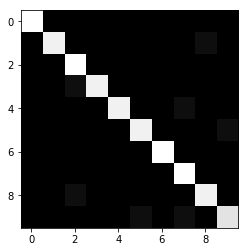

In [58]:
mat = sklearn.metrics.confusion_matrix(y_tst, h_tst)
print(mat)
imshow(mat, cmap=cm.gray)

## Cross validation

Dla małych zbiorów danych, bardziej przecyzyjny wynik można uzyskać używając procedury walidacji krzyżowej. W scikit-learn mamy do tego metodę *sklearn.model_selection.KFold*, albo jeszcze lepiej *sklearn.model_selection.StratifiedKFold*.

Stwórz obiekt tej klasy do wykonania walidacji 5-krzyżowej i w pętli for powtórz powyższy eksperyment zapisując miarę jakości dla każdego folda, a na końcu podaj jego średnią i odchylenie standardowe:

In [59]:
accs =[]

cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
for tr_idx, tst_idx in cv.split(X, y):
    X_tr = X[tr_idx]
    y_tr = y[tr_idx]

    X_tst = X[tst_idx]
    y_tst = y[tst_idx]
    
    model = sklearn.linear_model.LogisticRegression()
    model.fit(X_tr, y_tr)

    h_tst = model.predict(X_tst)
    
    acc = sklearn.metrics.accuracy_score(y_tst, h_tst)
    
    accs.append(acc)
    
accs = array(accs)

print(accs.mean())
print(accs.std())


0.957760385076
0.0082232783707


## Krzywa ROC

Krzywę tą też można wyliczyć tylko dla problemów binarnych. Dlatego musimy użyc podobnej metody "uśredniania" wyników jak w przypadku precision/recall. Dodatkowo, metoda ta jest o wiele bardziej precyzyjna jeśli wynikiem jest dokładna miara prawdopodbieństwa, zamiast binarnej klasy. Umożliwia nam ona ustalenie wartości progowej zależnej od wartości prawdopodobieństwa.

Wytrenuj ponownie model do regresji logistycznej (jak wyżej), ale tym razem użyj funkcji *decision_funcion* zamiast *predict* żeby otrzymać bardziej szczegółowy wynik klasyfikacji:

In [60]:
model = sklearn.linear_model.LogisticRegression()
model.fit(X_tr, y_tr)

h_tst = model.decision_function(X_tst)

Jeśli chcemy porównać ten wynik z etykietami refencji, musimy je najpierw zmienić do postaci binarnej. Można do tego użyć metody *sklearn.preprocessing.label_binarize*:

In [61]:
y_tst_bin = sklearn.preprocessing.label_binarize(y_tst, classes=digits['target_names'])


W tej chwili można wyliczyć krzywę ROC dla dowolnej klasy używając metodę *sklearn.metrics.roc_curve* i podając do niej wyniki dla wybranej klasy. Metoda ta zwraca trzy wartości, z których nas interesują tylko pierwsze dwie. Wartości te można podać zarówno do metody *plot*, jak i do metody *sklearn.metrics.auc* żeby wyliczyć miarę AUC danej krzywej. Narsyuj też na wykresie krzywą od (0,0) do (1,1) reprezentującą odcięcie klasyfikacji losowej:

0.987025426681


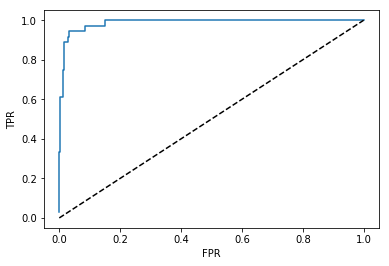

In [64]:
c = 1
f, t, _ = sklearn.metrics.roc_curve(y_tst_bin[:,c], h_tst[:,c])
auc = sklearn.metrics.auc(f, t)
plot(f,t)
plot([0,1],[0,1],'k--')
print(auc)
xlabel("FPR")
_=ylabel("TPR")

Można też narysować uśredniony wykres dla wszystkich klas (tzw. metodą "micro") używając funkcji *ravel()* dla macierzy wyniku i referencji.

Więcej informacji znajdziesz na stronie: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

0.997606295047


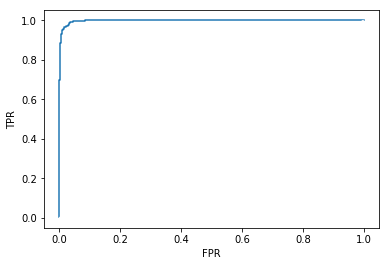

In [15]:
c = 0
f, t, _ = sklearn.metrics.roc_curve(y_tst_bin.ravel(), h_tst.ravel())
auc = sklearn.metrics.auc(f, t)
plot(f,t)
plot([0,1],[0,1],'w--')
print(auc)
xlabel("FPR")
_=ylabel("TPR")

In [16]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.svm import LinearSVC

# Praca domowa

Wybierz kilka (minimum 3!) różnych klasyfikatorów do problemów typu *multi-class* z tej strony: http://scikit-learn.org/stable/modules/multiclass.html - najlepiej spróbować zarówno *One-vs-all* jak i *One-vs-one* żeby zobaczyć który jest lepszy.

Wylicz i porównaj ich zarówno pod względem *accuracy* wyliczonego z walidacji krzyżowej jak i krzywych ROC. Wyniki podaj zarówno w postaci listy średnych i odchylenia *accuracy* oraz AUC, jak i w postaci wykresów: liniowych dla krzywych ROC (wszystkie klasyfikatory na jednym wykresie!) oraz *boxplot* dla miar *accuracy* (też wszystkie na jednym).

## Alternatywna praca domowa

Wylicz wynik klasyfikacji na innym zbiorze obrazów. Może to być oryginalny MNIST, CIFAR-10 lub coś innego podobnie złożonego.

One vs all
accuracy srednia 0.9522231558521785
accuracy odchylenie standardowe 0.009478523648975916
AUC 0.4942935528120713

One vs one
accuracy srednia 0.9810905015851052
accuracy odchylenie standardowe 0.008477551282071104
AUC 0.5020953360768176

Output code classifier
accuracy srednia 0.8781148250583215
accuracy odchylenie standardowe 0.01613633737323819


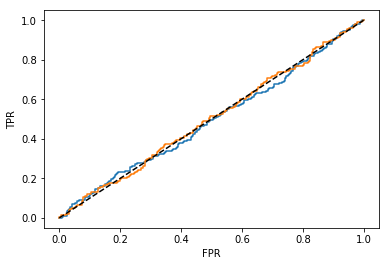

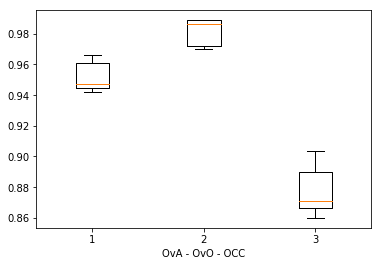

In [70]:
# Praca domowa wariant 1
sss = sklearn.model_selection.StratifiedShuffleSplit(test_size=0.1)
tr_idx, tst_idx = next(sss.split(X, y))

X_tr = X[tr_idx]
y_tr = y[tr_idx]

X_tst = X[tst_idx]
y_tst = y[tst_idx]

y_tst_bin = sklearn.preprocessing.label_binarize(y_tst, classes=digits['target_names'])

# One-vs-all
# Accuracy z walidacji krzyzowej
accs_ova = []

cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
for tr_idx, tst_idx in cv.split(X, y):
    X_tr = X[tr_idx]
    y_tr = y[tr_idx]

    X_tst = X[tst_idx]
    y_tst = y[tst_idx]
    
    model_ova = OneVsRestClassifier(LinearSVC(random_state=0))
    model_ova.fit(X_tr, y_tr)
    h_tst_ova = model_ova.predict(X_tst)
    
    acc = sklearn.metrics.accuracy_score(y_tst, h_tst_ova)
    
    accs_ova.append(acc)
    
accs_ova = array(accs_ova)

# Accuracy z ROC
sss = sklearn.model_selection.StratifiedShuffleSplit(test_size=0.1)
tr_idx, tst_idx = next(sss.split(X, y))

X_tr = X[tr_idx]
y_tr = y[tr_idx]

X_tst = X[tst_idx]
y_tst = y[tst_idx]

model_ova = OneVsRestClassifier(LinearSVC(random_state=0))
model_ova.fit(X_tr, y_tr)
h_tst = model_ova.decision_function(X_tst)

c = 6
f, t, _ = sklearn.metrics.roc_curve(y_tst_bin.ravel(), h_tst.ravel())
auc_ova = sklearn.metrics.auc(f, t)
plot(f,t)
plot([0,1],[0,1],'w--')
xlabel("FPR")
_=ylabel("TPR")

#############################################
# One-vs-one
# Accuracy z walidacji krzyzowej
accs_ovo = []

cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
for tr_idx, tst_idx in cv.split(X, y):
    X_tr = X[tr_idx]
    y_tr = y[tr_idx]

    X_tst = X[tst_idx]
    y_tst = y[tst_idx]
    
    model_ovo = OneVsOneClassifier(LinearSVC(random_state=0))
    model_ovo.fit(X_tr, y_tr)
    h_tst_ovo = model_ovo.predict(X_tst)
    
    acc = sklearn.metrics.accuracy_score(y_tst, h_tst_ovo)
    
    accs_ovo.append(acc)
    
accs_ovo = array(accs_ovo)

# Accuracy z ROC
sss = sklearn.model_selection.StratifiedShuffleSplit(test_size=0.1)
tr_idx, tst_idx = next(sss.split(X, y))

X_tr = X[tr_idx]
y_tr = y[tr_idx]

X_tst = X[tst_idx]
y_tst = y[tst_idx]

model_ovo = OneVsOneClassifier(LinearSVC(random_state=0))
model_ovo.fit(X_tr, y_tr)
h_tst = model_ovo.decision_function(X_tst)

f, t, _ = sklearn.metrics.roc_curve(y_tst_bin.ravel(), h_tst.ravel())
auc_ovo = sklearn.metrics.auc(f, t)
plot(f,t)
plot([0,1],[0,1],'k--')
xlabel("FPR")
_=ylabel("TPR")

#############################################
# Output Code Classifier
# Accuracy z walidacji krzyzowej
accs_occ = []

cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
for tr_idx, tst_idx in cv.split(X, y):
    X_tr = X[tr_idx]
    y_tr = y[tr_idx]

    X_tst = X[tst_idx]
    y_tst = y[tst_idx]
    
    model_occ = OutputCodeClassifier(LinearSVC(random_state=0), code_size=2, random_state=0)
    model_occ.fit(X_tr, y_tr)
    h_tst_occ = model_occ.predict(X_tst)
    
    acc = sklearn.metrics.accuracy_score(y_tst, h_tst_occ)
    
    accs_occ.append(acc)
    
accs_occ = array(accs_occ)

# Accuracy z ROC
# sss = sklearn.model_selection.StratifiedShuffleSplit(test_size=0.1)
# tr_idx, tst_idx = next(sss.split(X, y))

# X_tr = X[tr_idx]
# y_tr = y[tr_idx]

# X_tst = X[tst_idx]
# y_tst = y[tst_idx]

# model_occ = OutputCodeClassifier(LinearSVC(random_state=0), code_size=2, random_state=0)
# model_occ.fit(X_tr, y_tr)
# h_tst = model_occ.decision_function(X_tst)

# f, t, _ = sklearn.metrics.roc_curve(y_tst_bin.ravel(), h_tst.ravel())
# auc_occ = sklearn.metrics.auc(f, t)
# plot(f,t)
# plot([0,1],[0,1],'w--')
# xlabel("FPR")
# _=ylabel("TPR")

#############################################
# Zestawienie
# Lista srednich i odchylenia accuracy oraz AUC
print("One vs all")
print("accuracy srednia {}".format(accs_ova.mean()))
print("accuracy odchylenie standardowe {}".format(accs_ova.std()))
print("AUC {}".format(auc_ova))

print("\nOne vs one")
print("accuracy srednia {}".format(accs_ovo.mean()))
print("accuracy odchylenie standardowe {}".format(accs_ovo.std()))
print("AUC {}".format(auc_ovo))

print("\nOutput code classifier")
print("accuracy srednia {}".format(accs_occ.mean()))
print("accuracy odchylenie standardowe {}".format(accs_occ.std()))
# print("AUC " + auc_occ)

# Wykresy ROC

# Boxplot dla miar accuracy
figure()
boxplot([accs_ova, accs_ovo, accs_occ])
_ = xlabel("OvA - OvO - OCC")